# Paleontological Data from PAGES2k

In [1]:
!pip install lipd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.9/996.9 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 42.7 MB/s eta 0:00:00
  Created wheel for lipd: filename=LiPD-0.2.8.9-py3-none-any.whl size=139951 sha256=2341a28be788762892972531fe15f7aee1bdb7ed9376f93deb925a8a12bffbbb
  Stored in directory: /root/.cache/pip/wheels/f2/f4/92/5eab343dd60cf0fcf7e7b27711076ac0ef1291474fd7da7c6a
  Created wheel for demjson3: filename=demjson3-3.0.6-py3-none-any.whl size=75281 sha256=fac4deb527b7bd6cf5d57f319e6724a18f1579935f98e7ea1068a7040e64ebb0
  Stored in directory: /root/.cache/pip/wheels/3b/9d/d5/e8cbb4d529989f6d3f347fe914559ea4f66715bf299763af1c
Successfully built lipd demjson3


The LiPD format is designed to save paleoclimate data and metadata records in a clear structure, yet it can numerically slow to load when hundreds of files are involved, as in PAGES2k.
Therefore, we'd like to convert it to another data structure that is fast to load.
In this notebook, we demonstrate how to convert a collection of PAGES2k LiPD files to a Pandas dataframe and save it to a pickle file for later use.

In [2]:
import numpy as np
import pandas as pd
import lipd
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def lipd2df(lipd_dirpath, pkl_filepath, col_str=[
            'paleoData_pages2kID',
            'dataSetName', 'archiveType',
            'geo_meanElev', 'geo_meanLat', 'geo_meanLon',
            'year', 'yearUnits',
            'paleoData_variableName',
            'paleoData_units',
            'paleoData_values',
            'paleoData_proxy']):

    ''' Convert a bunch of PAGES2k LiPD files to a pickle file of Pandas DataFrame to boost data loading

    Args:
        lipd_dirpath (str): the path of the PAGES2k LiPD files
        pkl_filepath (str): the path of the converted pickle file
        col_str (list of str): the name string of the variables to extract from the LiPD files

    Returns:
        df (Pandas DataFrame): the converted Pandas DataFrame
    '''

    # save the current working directory for later use, as the LiPD utility will change it in the background
    work_dir = os.getcwd()

    # LiPD utility requries the absolute path, so let's get it
    lipd_dirpath = os.path.abspath(lipd_dirpath)

    # load LiPD files from the given directory
    lipds = lipd.readLipd(lipd_dirpath)

    # extract timeseries from the list of LiDP objects
    ts_list = lipd.extractTs(lipds)

    # recover the working directory
    os.chdir(work_dir)

    # create an empty pandas dataframe with the number of rows to be the number of the timeseries (PAGES2k records),
    # and the columns to be the variables we'd like to extract
    df_tmp = pd.DataFrame(index=range(len(ts_list)), columns=col_str)

    # loop over the timeseries and pick those for global temperature analysis
    i = 0
    for ts in ts_list:
        if 'paleoData_useInGlobalTemperatureAnalysis' in ts.keys() and \
            ts['paleoData_useInGlobalTemperatureAnalysis'] == 'TRUE':
            for name in col_str:
                try:
                    df_tmp.loc[i, name] = ts[name]
                except:
                    df_tmp.loc[i, name] = np.nan
            i += 1

    # drop the rows with all NaNs (those not for global temperature analysis)
    df = df_tmp.dropna(how='all')

    # save the dataframe to a pickle file for later use
    save_path = os.path.abspath(pkl_filepath)
    print(f'Saving pickle file at: {save_path}')
    df.to_pickle(save_path)

    return df

In [5]:
df = lipd2df('/content/drive/MyDrive/NOAAData', '/content/drive/MyDrive/WhiteNoisepkl/NOAA.pkl')

Streaming output truncated to the last 5000 lines.
Error: Unable to update file to LiPD v1.3: dictionary keys changed during iteration
Error: Unable to update file to LiPD v1.3: dictionary keys changed during iteration
Error: Unable to update file to LiPD v1.3: dictionary keys changed during iteration
reading: Asi-GHEGAN.PAGES2k.2013.lpd
Error: Unable to update file to LiPD v1.3: dictionary keys changed during iteration
Error: Unable to update file to LiPD v1.3: dictionary keys changed during iteration
Error: Unable to update file to LiPD v1.3: dictionary keys changed during iteration
reading: Asi-GOUQIN.PAGES2k.2013.lpd
Error: Unable to update file to LiPD v1.3: dictionary keys changed during iteration
Error: Unable to update file to LiPD v1.3: dictionary keys changed during iteration
Error: Unable to update file to LiPD v1.3: dictionary keys changed during iteration
reading: Asi-Guangdong.Zheng.1982.lpd
Error: Unable to update file to LiPD v1.3: dictionary keys changed during iterati

In [6]:
# now we can take a look at the dataframe
df

,paleoData_pages2kID,dataSetName,archiveType,geo_meanElev,geo_meanLat,geo_meanLon,year,yearUnits,paleoData_variableName,paleoData_units,paleoData_values,paleoData_proxy
0,Afr_012,Afr-ColdAirCave.Sundqvist.2013,speleothem,1450.0,-24.0,29.18,"[1992.0, 1991.0, 1990.0, 1989.0, 1988.0, 1987....",AD,d18O,permil,"[0.459055, 0.4062401, 0.3621507, 0.3517711, 0....",d18O
1,Afr_005,Afr-LakeMalawi.Powers.2011,lake sediment,477.0,-10.0033,34.2883,"[1996.0, 1992.0, 1981.0, 1965.0, 1959.0, 1954....",AD,temperature,degC,"[27.43, 26.84, 26.87, 26.85, 25.33, 26.44, 26....",TEX86
2,Afr_004,Afr-LakeTanganyika.Tierney.2010,lake sediment,905.0,-6.03,28.53,"[1986.0, 1976.0, 1966.0, 1956.0, 1946.0, 1936....",AD,temperature,degC,"[25.6263562901116, 24.9873700037754, 24.559853...",TEX86
3,Ocn_136,Afr-P178-15P.Tierney.2015,marine sediment,-869.0,11.955,44.3,"[2000.0, 1997.0, 1993.6667, 1991.0, 1988.3333,...",AD,temperature,degC,"[27.991, 28.0915, 28.138, 27.9088, 27.9526, 28...",TEX86
4,Ocn_137,Afr-P178-15P.Tierney.2015,marine sediment,-869.0,11.955,44.3,"[1980.0, 1974.0625, 1968.1875, 1962.3125, 1956...",AD,temperature,degC,"[27.5623, 27.3648, 27.6094, 27.5759, 27.6686, ...",TEX86
...,...,...,...,...,...,...,...,...,...,...,...,...
687,SAm_029,SAm-CentralAndes15.Neukom.2014,tree,1300.0,-41.17,-71.92,"[1582.0, 1583.0, 1584.0, 1585.0, 1586.0, 1587....",AD,trsgi,NA,"[1.177, 0.909, 0.931, 0.407, -0.927, -1.477, -...",TRW
688,SAm_003,SAm-LagunaAculeo.vonGunten.2009,lake sediment,355.0,-33.85,-70.92,"[856.0, 857.0, 858.0, 859.0, 860.0, 861.0, 862...",AD,temperature3,degC,"[19.166, 19.14, 19.094, 19.028, 18.954, 18.881...",reflectance
689,SAm_030,SAm-LagunaChepical.deJong.2013,lake sediment,3050.0,-32.2667,-70.5,"[-1161.0, -1160.0, -1159.0, -1158.0, -1157.0, ...",AD,temperature,degC,"[7.7935, 7.8109, 7.8282, 7.8415, 7.8466, 7.839...",reflectance
690,SAm_031,SAm-LagunaEscondida.Elbert.2013,lake sediment,725.0,-45.5167,-71.8167,"[400.0, 401.0, 402.0, 403.0, 404.0, 405.0, 406...",AD,temperature,degC,"[-1.4772, -1.4743, -1.4714, -1.497, -1.5418, -...",BSi


# **plot map**

In [7]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 83.5 MB/s eta 0:00:00


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import os
import numpy as np
from matplotlib.ticker import FormatStrFormatter
import geopandas as gpd

# Set plot style
sns.set_theme(style="darkgrid")
plt.rcParams['font.size'] = 15
plt.rcParams["font.family"] = "serif"

In [9]:
# load the pickled dataframe of the PAGES2k dataset
df = pd.read_pickle('/content/drive/MyDrive/WhiteNoisepkl/NOAA.pkl')

In [10]:
# a bunch of PAGES2k style settings
class PAGES2k(object):
    archive_types = ['bivalve',
                    'borehole',
                    'coral',
                    'documents',
                    'glacier ice',
                    'hybrid',
                    'lake sediment',
                    'marine sediment',
                    'sclerosponge',
                    'speleothem',
                    'tree',
                    ]
    markers = ['p', 'p', 'o', 'v', 'd', '*', 's', 's', '8', 'D', '^']
    markers_dict = dict(zip(archive_types, markers))

    colors = [np.array([ 1.        ,  0.83984375,  0.        ]),
              np.array([ 0.73828125,  0.71484375,  0.41796875]),
              np.array([ 1.        ,  0.546875  ,  0.        ]),
              np.array([ 0.41015625,  0.41015625,  0.41015625]),
              np.array([ 0.52734375,  0.8046875 ,  0.97916667]),
              np.array([ 0.        ,  0.74609375,  1.        ]),
              np.array([ 0.25390625,  0.41015625,  0.87890625]),
              np.array([ 0.54296875,  0.26953125,  0.07421875]),
              np.array([ 1         ,           0,           0]),
              np.array([ 1.        ,  0.078125  ,  0.57421875]),
              np.array([ 0.1953125 ,  0.80078125,  0.1953125 ])]
    colors_dict = dict(zip(archive_types, colors))

/usr/local/lib/python3.11/dist-packages/cartopy/mpl/geoaxes.py:1692: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  result = super().scatter(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/geoaxes.py:1692: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  result = super().scatter(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cartopy/mpl/geoaxes.py:1692: UserWarning: *c* argument looks like a single

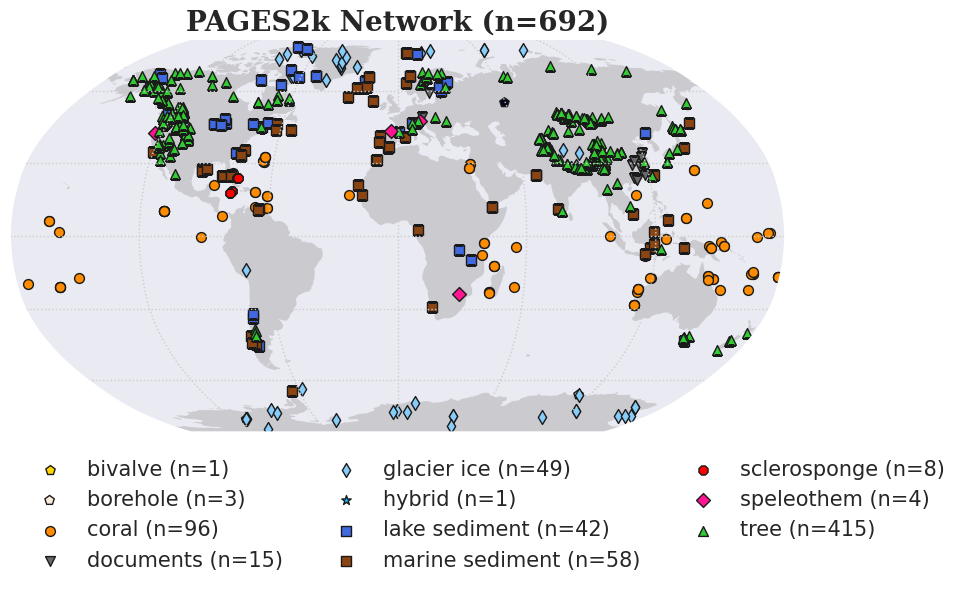

In [11]:
def plot_sites(df, title=None, lon_col='geo_meanLon', lat_col='geo_meanLat', archiveType_col='archiveType',
               title_size=20, title_weight='bold', figsize=[10, 8], projection=ccrs.Robinson(), markersize=50,
               plot_legend=True, legend_ncol=3, legend_anchor=(0, -0.4), legend_fontsize=15, frameon=False, ax=None):

    ''' Plot the location of the sites on a map

    Args:
        df (Pandas DataFrame): the Pandas DataFrame

    Returns:
        ax (Axes): the map plot of the sites

    '''
    p = PAGES2k()
    if ax is None:
        fig = plt.figure(figsize=figsize)
        ax = plt.subplot(projection=projection)

    sns.set(style="ticks", font_scale=2)

    # plot map
    if title:
        plt.title(title, fontsize=title_size, fontweight=title_weight)

    ax.set_global()
    ax.add_feature(cfeature.LAND, facecolor='gray', alpha=0.3)
    ax.gridlines(edgecolor='gray', linestyle=':')

    # plot markers by archive types
    s_plots = []
    type_names = []
    df_archiveType_set = np.unique(df[archiveType_col])
    for type_name in df_archiveType_set:
        selector = df[archiveType_col] == type_name
        type_names.append(f'{type_name} (n={len(df[selector])})')
        s_plots.append(
            ax.scatter(
                df[selector][lon_col], df[selector][lat_col], marker=p.markers_dict[type_name],
                c=p.colors_dict[type_name], edgecolor='k', s=markersize, transform=ccrs.Geodetic()
            )
        )

    # plot legend
    if plot_legend:
        plt.legend(
            s_plots, type_names,
            scatterpoints=1,
            bbox_to_anchor=legend_anchor,
            loc='lower left',
            ncol=legend_ncol,
            frameon=frameon,
            fontsize=legend_fontsize
        )

    return ax

ax = plot_sites(df, title=f'PAGES2k Network (n={len(df)})')

# Paleodata extraction

In [23]:
df

,paleoData_pages2kID,dataSetName,archiveType,geo_meanElev,geo_meanLat,geo_meanLon,year,yearUnits,paleoData_variableName,paleoData_units,paleoData_values,paleoData_proxy
0,Afr_012,Afr-ColdAirCave.Sundqvist.2013,speleothem,1450.0,-24.0,29.18,"[1992.0, 1991.0, 1990.0, 1989.0, 1988.0, 1987....",AD,d18O,permil,"[0.459055, 0.4062401, 0.3621507, 0.3517711, 0....",d18O
1,Afr_005,Afr-LakeMalawi.Powers.2011,lake sediment,477.0,-10.0033,34.2883,"[1996.0, 1992.0, 1981.0, 1965.0, 1959.0, 1954....",AD,temperature,degC,"[27.43, 26.84, 26.87, 26.85, 25.33, 26.44, 26....",TEX86
2,Afr_004,Afr-LakeTanganyika.Tierney.2010,lake sediment,905.0,-6.03,28.53,"[1986.0, 1976.0, 1966.0, 1956.0, 1946.0, 1936....",AD,temperature,degC,"[25.6263562901116, 24.9873700037754, 24.559853...",TEX86
3,Ocn_136,Afr-P178-15P.Tierney.2015,marine sediment,-869.0,11.955,44.3,"[2000.0, 1997.0, 1993.6667, 1991.0, 1988.3333,...",AD,temperature,degC,"[27.991, 28.0915, 28.138, 27.9088, 27.9526, 28...",TEX86
4,Ocn_137,Afr-P178-15P.Tierney.2015,marine sediment,-869.0,11.955,44.3,"[1980.0, 1974.0625, 1968.1875, 1962.3125, 1956...",AD,temperature,degC,"[27.5623, 27.3648, 27.6094, 27.5759, 27.6686, ...",TEX86
...,...,...,...,...,...,...,...,...,...,...,...,...
687,SAm_029,SAm-CentralAndes15.Neukom.2014,tree,1300.0,-41.17,-71.92,"[1582.0, 1583.0, 1584.0, 1585.0, 1586.0, 1587....",AD,trsgi,NA,"[1.177, 0.909, 0.931, 0.407, -0.927, -1.477, -...",TRW
688,SAm_003,SAm-LagunaAculeo.vonGunten.2009,lake sediment,355.0,-33.85,-70.92,"[856.0, 857.0, 858.0, 859.0, 860.0, 861.0, 862...",AD,temperature3,degC,"[19.166, 19.14, 19.094, 19.028, 18.954, 18.881...",reflectance
689,SAm_030,SAm-LagunaChepical.deJong.2013,lake sediment,3050.0,-32.2667,-70.5,"[-1161.0, -1160.0, -1159.0, -1158.0, -1157.0, ...",AD,temperature,degC,"[7.7935, 7.8109, 7.8282, 7.8415, 7.8466, 7.839...",reflectance
690,SAm_031,SAm-LagunaEscondida.Elbert.2013,lake sediment,725.0,-45.5167,-71.8167,"[400.0, 401.0, 402.0, 403.0, 404.0, 405.0, 406...",AD,temperature,degC,"[-1.4772, -1.4743, -1.4714, -1.497, -1.5418, -...",BSi


<ipython-input-25-8f4f5ac66b69>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trsgi_data['paleoData_values'] = pd.to_numeric(trsgi_data['paleoData_values'], errors='coerce')
<ipython-input-25-8f4f5ac66b69>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trsgi_data.dropna(subset=['paleoData_values'], inplace=True)


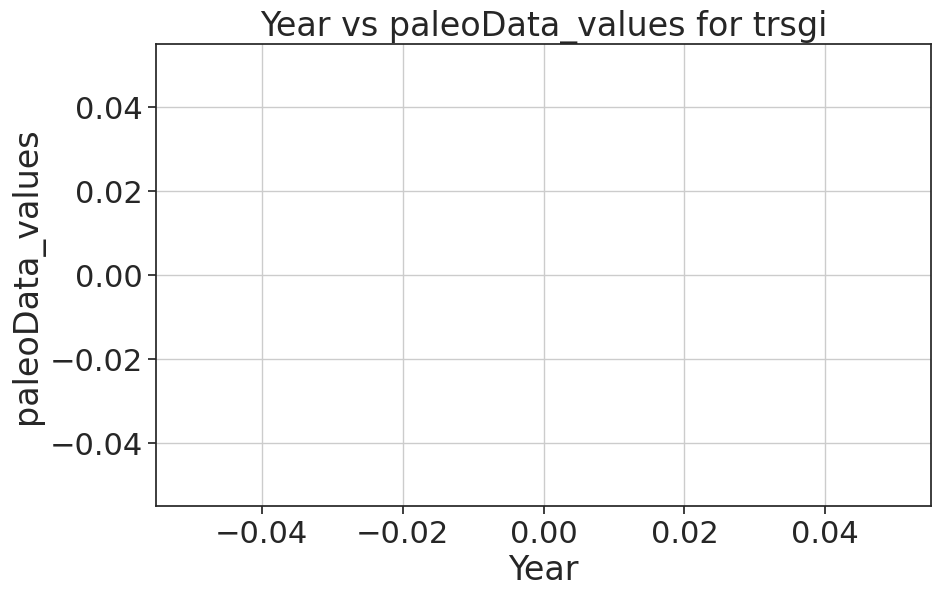

In [25]:
# prompt: Using dataframe df: Plot the year vs paleoData_values for trsgi variable_name, take note of the error: ValueError: setting an array element with a sequence.

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Filter data for 'trsgi' variable name
trsgi_data = df[df['paleoData_variableName'] == 'trsgi']

# Check if any data exists for 'trsgi' and handle empty case
if trsgi_data.empty:
  print("No data found for 'trsgi' variable name.")
else:
  try:
    # Convert 'paleoData_values' to numeric type if possible, otherwise handle errors
    trsgi_data['paleoData_values'] = pd.to_numeric(trsgi_data['paleoData_values'], errors='coerce')

    # Remove rows with NaN values in the 'paleoData_values' column
    trsgi_data.dropna(subset=['paleoData_values'], inplace=True)

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(trsgi_data['year'], trsgi_data['paleoData_values'])
    plt.xlabel('Year')
    plt.ylabel('paleoData_values')
    plt.title('Year vs paleoData_values for trsgi')
    plt.grid(True)
    plt.show()
  except (ValueError, TypeError) as e:
    print(f"Error during plotting: {e}")
    # Examine the content of the 'paleoData_values' column
    print(trsgi_data['paleoData_values'].head())


In [21]:
# Check Available Variables
print("Unique paleoData_variableName values:", df["paleoData_variableName"].unique())

# Filter Only Temperature Data
df_trsgi = df[df["paleoData_variableName"].str.contains("trsgi", case=False, na=False)].copy()

# Expand List Columns (Year & Values)
df_trsgi = df_trsgi.explode(["year", "paleoData_values"])

# Convert Columns to Numeric
df_trsgi["year"] = pd.to_numeric(df_trsgi["year"], errors="coerce")
df_trsgi["paleoData_values"] = pd.to_numeric(df_trsgi["paleoData_values"], errors="coerce")

# Remove Years Below 0
df_trsgi = df_trsgi[df_trsgi["year"] >= 0]

Unique paleoData_variableName values: ['d18O' 'temperature' 'dD' 'density' 'trsgi' 'thickness' 'MXD'
 'X_radiograph_dark_layer' 'massacum' 'melt' 'temperature1' 'RABD660_670'
 'Sr_Ca' 'composite' 'calcification' 'temperature3']


In [22]:
df_trsgi

,paleoData_pages2kID,dataSetName,archiveType,geo_meanElev,geo_meanLat,geo_meanLon,year,yearUnits,paleoData_variableName,paleoData_units,paleoData_values,paleoData_proxy
37,Arc_002,Arc-Avam-Taimyr.Briffa.2008,tree,250.0,72.0,101.0,0.0,AD,trsgi,NA,362.000,TRW
37,Arc_002,Arc-Avam-Taimyr.Briffa.2008,tree,250.0,72.0,101.0,1.0,AD,trsgi,NA,399.000,TRW
37,Arc_002,Arc-Avam-Taimyr.Briffa.2008,tree,250.0,72.0,101.0,2.0,AD,trsgi,NA,693.000,TRW
37,Arc_002,Arc-Avam-Taimyr.Briffa.2008,tree,250.0,72.0,101.0,3.0,AD,trsgi,NA,727.000,TRW
37,Arc_002,Arc-Avam-Taimyr.Briffa.2008,tree,250.0,72.0,101.0,4.0,AD,trsgi,NA,1148.000,TRW
...,...,...,...,...,...,...,...,...,...,...,...,...
687,SAm_029,SAm-CentralAndes15.Neukom.2014,tree,1300.0,-41.17,-71.92,1987.0,AD,trsgi,NA,0.277,TRW
687,SAm_029,SAm-CentralAndes15.Neukom.2014,tree,1300.0,-41.17,-71.92,1988.0,AD,trsgi,NA,0.985,TRW
687,SAm_029,SAm-CentralAndes15.Neukom.2014,tree,1300.0,-41.17,-71.92,1989.0,AD,trsgi,NA,1.374,TRW
687,SAm_029,SAm-CentralAndes15.Neukom.2014,tree,1300.0,-41.17,-71.92,1990.0,AD,trsgi,NA,0.850,TRW


In [17]:
# Filter datasets that have data reaching year 2000
df_2000 = df_trsgi[df_trsgi["year"] == 2000]
df_2000

,paleoData_pages2kID,dataSetName,archiveType,geo_meanElev,geo_meanLat,geo_meanLon,year,yearUnits,paleoData_variableName,paleoData_units,paleoData_values,paleoData_proxy
37,Arc_002,Arc-Avam-Taimyr.Briffa.2008,tree,250.0,72.0,101.0,2000.0,AD,trsgi,NA,840.000000,TRW
70,Arc_073,Arc-MackenzieDelta.Porter.2013,tree,5.0,68.625,-133.87,2000.0,AD,trsgi,NA,7.866797,TRW
90,Arc_008,Arc-Yukon.D'Arrigo.2006,tree,300.0,67.9,-140.7,2000.0,AD,trsgi,NA,1.500000,TRW
92,Asi_002,Asi-AltaiDjasator.Cook.2011,tree,2100.0,49.62,88.1,2000.0,AD,trsgi,NA,1.131000,TRW
95,Asi_004,Asi-AltaiKuraisky.Cook.2011,tree,2000.0,50.3,87.83,2000.0,AD,trsgi,NA,1.046000,TRW
...,...,...,...,...,...,...,...,...,...,...,...,...
514,NAm_186,NAm-TamarackBowl.Sauchyn.2016,tree,1838.0,49.3,-114.4,2000.0,AD,trsgi,NA,1.254000,TRW
521,NAm_188,NAm-VicaryMine.Sauchyn.2016,tree,1909.0,49.8,-114.5,2000.0,AD,trsgi,NA,0.720000,TRW
522,NAm_093,NAm-WindyRidgeAlaska.D'Arrigo.2005,tree,251.0,65.2,-162.2,2000.0,AD,trsgi,NA,1.063000,TRW
684,SAm_024,SAm-CentralAndes6.Villalba.2014,tree,1400.0,-38.5,-71.5,2000.0,AD,trsgi,NA,0.341000,TRW


In [19]:
# Ensure numeric columns
df_trsgi["year"] = pd.to_numeric(df_trsgi["year"], errors="coerce")
df_trsgi["paleoData_values"] = pd.to_numeric(df_trsgi["paleoData_values"], errors="coerce")

# # Define datasets for each continent
# selected_datasets = {
#     "Africa": ['Afr-P178-15P.Tierney.2015'],
#     "Antarctica": ['Ant-WAIS-Divide.Severinghaus.2012'],
#     "Asia": ['Arc-Yamalia.Briffa.2013', 'Asi-KunashirIsland.Demezhko.2009'],
#     "Europe": [
#         "Arc-Kongressvatnet.D'Andrea.2012", 'Arc-Tornetrask.Melvin.2012',
#         'Eur-CentralEurope.Dobrovolný.2009', 'Eur-FinnishLakelands.Helama.2014',
#         'Eur-Seebergsee.Larocque-Tobler.2012', 'Eur-Tallinn.Tarand.2001',
#         'Ocn-TagusMudPatch.Abrantes.2005'
#     ],
#     "North America": ['Arc-BigRoundLake.Thomas.2009', 'Arc-GulfofAlaska.Wilson.2014', 'NAm-STREC.Gennaretti.2014'],
#     "Oceania": ['Aus-MtRead.Cook.2006'],
#     "South America": ['SAm-LagunaChepical.deJong.2013', 'SAm-LagunaEscondida.Elbert.2013']
# }

# # Create output folder
# output_folder = "paleoData_temp_exports1"
# os.makedirs(output_folder, exist_ok=True)

# # Export each dataset to CSV
# for continent, datasets in selected_datasets.items():
#     for dataset_name in datasets:
#         # Filter data for the specific dataset
#         subset = df_temp[df_temp["dataSetName"] == dataset_name][["year", "paleoData_values"]]

#         if subset.empty:
#             print(f"Warning: No data found for {dataset_name}. Skipping export.")
#             continue

#         # Create a valid filename (remove problematic characters)
#         safe_filename = "".join(c if c.isalnum() or c in "._-" else "_" for c in dataset_name)

#         # Save to CSV
#         file_path = os.path.join(output_folder, f"{safe_filename}.csv")
#         subset.to_csv(file_path, index=False)

#         print(f"Saved: {file_path}")

# # List exported files for verification
# print(f"Exported files: {os.listdir(output_folder)}")

In [20]:
df_trsgi

,paleoData_pages2kID,dataSetName,archiveType,geo_meanElev,geo_meanLat,geo_meanLon,year,yearUnits,paleoData_variableName,paleoData_units,paleoData_values,paleoData_proxy
37,Arc_002,Arc-Avam-Taimyr.Briffa.2008,tree,250.0,72.0,101.0,0.0,AD,trsgi,NA,362.000,TRW
37,Arc_002,Arc-Avam-Taimyr.Briffa.2008,tree,250.0,72.0,101.0,1.0,AD,trsgi,NA,399.000,TRW
37,Arc_002,Arc-Avam-Taimyr.Briffa.2008,tree,250.0,72.0,101.0,2.0,AD,trsgi,NA,693.000,TRW
37,Arc_002,Arc-Avam-Taimyr.Briffa.2008,tree,250.0,72.0,101.0,3.0,AD,trsgi,NA,727.000,TRW
37,Arc_002,Arc-Avam-Taimyr.Briffa.2008,tree,250.0,72.0,101.0,4.0,AD,trsgi,NA,1148.000,TRW
...,...,...,...,...,...,...,...,...,...,...,...,...
687,SAm_029,SAm-CentralAndes15.Neukom.2014,tree,1300.0,-41.17,-71.92,1987.0,AD,trsgi,NA,0.277,TRW
687,SAm_029,SAm-CentralAndes15.Neukom.2014,tree,1300.0,-41.17,-71.92,1988.0,AD,trsgi,NA,0.985,TRW
687,SAm_029,SAm-CentralAndes15.Neukom.2014,tree,1300.0,-41.17,-71.92,1989.0,AD,trsgi,NA,1.374,TRW
687,SAm_029,SAm-CentralAndes15.Neukom.2014,tree,1300.0,-41.17,-71.92,1990.0,AD,trsgi,NA,0.850,TRW
